In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import datetime as dt

# Load data from insideAirbnb for Host/Property Characteristics

There are a total of 2558 listings in Boston area as of September 2015. "Listings 2" is the .csv file from InsideAirbnb.

We need to download different sets of data when switching to a new city.

In [3]:
listings_ia2 = pd.read_csv('listings_nyc.csv')

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
listings_ia2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6627449,https://www.airbnb.com/rooms/6627449,20160201235331,2016-02-02,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10,f,NaN,NaN,f,flexible,f,f,1,1.12
1,7949480,https://www.airbnb.com/rooms/7949480,20160201235331,2016-02-02,City Island Sanctuary Sunny BR & BA,Sunny relaxing room w/ adjacent pvt. bath in a...,We have just moved to City Island from CA so w...,Sunny relaxing room w/ adjacent pvt. bath in a...,none,City Island is a unique sanctuary in New York ...,...,10,f,NaN,NaN,f,moderate,t,t,1,1.00
2,1886820,https://www.airbnb.com/rooms/1886820,20160201235331,2016-02-02,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,5557381,https://www.airbnb.com/rooms/5557381,20160201235331,2016-02-02,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,9,f,NaN,NaN,t,moderate,f,f,1,4.84
4,9019702,https://www.airbnb.com/rooms/9019702,20160201235331,2016-02-02,City Island Sugar Shack,Cozy street off of trendy City Island . Home i...,NaN,Cozy street off of trendy City Island . Home i...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [5]:
print (listings_ia2.columns)
print len(listings_ia2)

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'thumbnail_url',
       u'medium_url', u'picture_url', u'xl_picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_thumbnail_url',
       u'host_picture_url', u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommodates', u

In [6]:
attributes = [u'id', u'listing_url', u'host_id',u'host_url', u'host_name', 
              u'host_response_time', u'host_response_rate',u'host_acceptance_rate', u'host_is_superhost',
             u'host_total_listings_count', u'monthly_price', u'minimum_nights',u'number_of_reviews', u'instant_bookable', 
              u'room_type',u'beds']
listings_original = listings_ia2[attributes]

In [7]:
listings_original.head()

,id,listing_url,host_id,host_url,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,monthly_price,minimum_nights,number_of_reviews,instant_bookable,room_type,beds
0,6627449,https://www.airbnb.com/rooms/6627449,13886510,https://www.airbnb.com/users/show/13886510,Arlene,within a day,100%,NaN,f,1,NaN,3,8,f,Entire home/apt,1
1,7949480,https://www.airbnb.com/rooms/7949480,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,within an hour,100%,100%,f,1,NaN,1,1,f,Private room,1
2,1886820,https://www.airbnb.com/rooms/1886820,9815788,https://www.airbnb.com/users/show/9815788,Steve,NaN,NaN,NaN,f,1,NaN,7,0,f,Entire home/apt,3
3,5557381,https://www.airbnb.com/rooms/5557381,28811542,https://www.airbnb.com/users/show/28811542,Phoebe,within an hour,100%,100%,t,1,"$1,200.00",1,41,t,Private room,1
4,9019702,https://www.airbnb.com/rooms/9019702,46642112,https://www.airbnb.com/users/show/46642112,Jody,within a day,50%,NaN,f,1,"$3,500.00",1,0,f,Entire home/apt,1


# Calendar related attributes

We need to process the calendar data, which help us understand available openings and decide what dates to ask to each host.

## 1. Read in calendar data from JSON and parse into a dataframe

###  Import JSONs

The raw output of calendar scraping tool is stored in a JSON file called "cal.json". Here we load it into a dataframe

In [8]:
def merge_dicts(*dict_args):
    '''
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    '''
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result

# cal = pd.read_json('calendars/cal.json')
# cal2 = pd.read_json('calendars/cal_2.json')
# cal3 = pd.read_json('calendars/cal_3.json')
# cal4 = pd.read_json('calendars/cal_3.json')
# calendars = merge_dicts(cal,cal2,cal3,cal4)

calendars = pd.read_json('nyc_cal.json')

### JSON to dictionary

Then, we convert the dataframe into a dictionary, with keys to be each listing_id and values to be an array of lists containing 

* availability
* date
* minimum nights
* nightly price

for each day.

There are a total of 1899 calendars scraped for Boston, which are fewer than the number of listings in the Inside Airbnb data. Some apartments may have been delisted. Meanwhile, we are missing the new listings from September 2015 to now.

```````````````````````````````````````````````````````````````````````````````````
`IT IS CRUCIAL TO CHANGE THE TODAY_PARSED VARIABLE TO REFLECT THE DATE OF SCRAPING`
```````````````````````````````````````````````````````````````````````````````````

In [9]:
today_parsed = dt.datetime.today() #-dt.timedelta(days=8)
# today_parsed = dt.datetime.today()

def parse_calendar(list_calendar):
    date = []
    price_USD = []
    availability = []
    min_nights = []
    day_list = []
    
    for month in list_calendar['calendar_months']:
        for day in month['days']:
            day_parsed = dt.datetime.strptime(day['date'], '%Y-%m-%d')
            if (day_parsed > today_parsed) & (day_parsed not in day_list):
                date.append(day['date'])
                price_USD.append(day['price']['local_price'])
                availability.append(day['available'])
                min_nights.append(month['condition_ranges'][0]['conditions'][u'min_nights'])
            day_list.append(day_parsed)
    return pd.DataFrame({'date':date, 'price_USD': price_USD, 'availability':availability, 'min_nights': min_nights})

In [10]:
parsed_calendars = {}
for i in calendars.keys():
    parsed_calendars[i] = parse_calendar(calendars[i])

In [11]:
len(parsed_calendars)

2399

In [12]:
#parsed_calendars[5267396].values

### Dictionary to dataframe

In [13]:
id = [int(i) for i in parsed_calendars.keys()]
df_calendar = pd.DataFrame({'id': id, 'calendars': parsed_calendars.values()})

In [14]:
df_calendar.head()

,calendars,id
0,availability date min_nights price...,3309572
1,availability date min_nights price...,4556118
2,availability date min_nights price...,9412617
3,availability date min_nights price...,1646607
4,availability date min_nights price...,671765


In [15]:
print "Row 0's calendars value: "
df_calendar.loc[1]["calendars"]

Row 0's calendars value: 


,availability,date,min_nights,price_USD
0,True,2016-03-30,30,33
1,True,2016-03-31,30,33
2,True,2016-04-01,30,33
3,True,2016-04-02,30,33
4,True,2016-04-03,30,33
5,True,2016-04-04,30,33
6,True,2016-04-05,30,33
7,True,2016-04-06,30,33
8,True,2016-04-07,30,33
9,True,2016-04-08,30,33


### Preprocess dataframe 

#### This step is very important because a few decisions are made here and may impact the sampling.

Row by row, add list of openings to each property ID, along with the length of opening, the minimum stay and the number of days in advance.

* For openings of length 3-days or more, pick a random 2-day interval as samples for 2-day non-orphan days.
* Unbookable openings (trip_length < minimum stay) are excluded

In [16]:
# Input: row index
# Output: a list of openings, each of which is a list itself, containing key information about the listing

def generate_opening_list(row_id):
    df_single = df_calendar[df_calendar['id']==row_id]['calendars'].values[0]
    
    list_all_openings = []
    list_current_opening = []
    last_open = 0
    for (i,day_values) in zip(df_single.index, df_single.values):
        # if an opening ends, then reset the current_opening list and append the previous opening to all_openings
        if (last_open==1) & (day_values[0]==0):
            list_all_openings.append(list_current_opening)
            list_current_opening = []
        # if the day is available, append the opening info to the current_opening list
        elif (day_values[0]==1):
            info_open_day = day_values[1:]
            info_open_day[0] = dt.datetime.strptime(info_open_day[0], '%Y-%m-%d')
            list_current_opening.append(info_open_day)

        # set the availability label for yesterday    
        last_open = day_values[0]

    # list_all_openings
    list_bookable_openings = []
    for opening in list_all_openings:
        # calculate the length of opening
        length = (opening[-1][0] - opening[0][0]).days + 1
        # if the length is bigger than 3, then randomly draw a 2-day opening to be the 2-day non-orphan
        if length > 3:
            start_index =  np.random.randint(low=0, high=length-2)
            opening = opening[start_index:start_index+3]
            
        # calculate the opening information and construct a list    
        start = opening[0][0]
        end = opening[-1][0] + dt.timedelta(days=1)
        trip_length = (end - start).days
        min_night = np.max(opening, axis=0)[1]
        avg_price = np.mean([x[2] for x in opening])
        advance = (start - today_parsed).days
        opening_info = [start, end, length, min_night, advance, trip_length, avg_price]

        # append the list to the list of all openings
        if (length >= min_night):
            list_bookable_openings.append(opening_info)  

    return list_bookable_openings

In [17]:
#df_single = df_calendar[df_calendar['id']==8339473]['calendars'].values[0]
#df_single

#### Append the openings to the dataframe as a column

In [18]:
series_opening=[]

for i in df_calendar.index:
    id_for_opening = df_calendar.iloc[[i]]['id'].values
    series_opening.append(generate_opening_list(id_for_opening[0]))
    
df_calendar['openings']=series_opening
df_calendar.head(10)

,calendars,id,openings
0,availability date min_nights price...,3309572,[]
1,availability date min_nights price...,4556118,[]
2,availability date min_nights price...,9412617,"[[2016-04-16 00:00:00, 2016-04-19 00:00:00, 3,..."
3,availability date min_nights price...,1646607,"[[2016-04-17 00:00:00, 2016-04-20 00:00:00, 38..."
4,availability date min_nights price...,671765,"[[2016-05-04 00:00:00, 2016-05-07 00:00:00, 31..."
5,availability date min_nights price...,753687,"[[2016-04-15 00:00:00, 2016-04-18 00:00:00, 5,..."
6,availability date min_nights price...,1810457,"[[2016-04-20 00:00:00, 2016-04-23 00:00:00, 22..."
7,availability date min_nights price...,5980191,"[[2016-04-04 00:00:00, 2016-04-07 00:00:00, 23..."
8,availability date min_nights price...,1242460,"[[2016-04-10 00:00:00, 2016-04-13 00:00:00, 3,..."
9,availability date min_nights price...,2236458,[]


In [19]:
df_calendar["openings"].iloc[5]

[[datetime.datetime(2016, 4, 15, 0, 0),
  datetime.datetime(2016, 4, 18, 0, 0),
  5,
  3L,
  16,
  3,
  115.0],
 [datetime.datetime(2016, 4, 26, 0, 0),
  datetime.datetime(2016, 4, 29, 0, 0),
  4,
  3L,
  27,
  3,
  115.0],
 [datetime.datetime(2016, 5, 8, 0, 0),
  datetime.datetime(2016, 5, 11, 0, 0),
  6,
  3L,
  39,
  3,
  115.0]]

* Properties with no bookable openings are excluded

In [20]:
bookable_mask = np.sign([opening_shape[0] for opening_shape in df_calendar["openings"].apply(np.shape).values])
df_calendar_bookable = df_calendar[bookable_mask==1].reset_index(drop=True)
df_calendar_bookable.head()

,calendars,id,openings
0,availability date min_nights price...,9412617,"[[2016-04-16 00:00:00, 2016-04-19 00:00:00, 3,..."
1,availability date min_nights price...,1646607,"[[2016-04-17 00:00:00, 2016-04-20 00:00:00, 38..."
2,availability date min_nights price...,671765,"[[2016-05-04 00:00:00, 2016-05-07 00:00:00, 31..."
3,availability date min_nights price...,753687,"[[2016-04-15 00:00:00, 2016-04-18 00:00:00, 5,..."
4,availability date min_nights price...,1810457,"[[2016-04-20 00:00:00, 2016-04-23 00:00:00, 22..."


In [21]:
len(df_calendar_bookable)

1118

## 2. Calculate calendar attributes

This exploratory analysis helps us to understand trends and potential problems with the data. We have gone through an interative process to modify the pre-process based on observations made on the charts below.

### a. price average and standard deviation

In [22]:
df_calendar_bookable['price_avg'] = [np.mean(df_calendar_bookable['calendars'][i]['price_USD']) for i in df_calendar_bookable.index.values]
df_calendar_bookable['price_std'] = [np.std(df_calendar_bookable['calendars'][i]['price_USD']) for i in df_calendar_bookable.index.values]

df_calendar_bookable.head()

,calendars,id,openings,price_avg,price_std
0,availability date min_nights price...,9412617,"[[2016-04-16 00:00:00, 2016-04-19 00:00:00, 3,...",168.031579,5.322154
1,availability date min_nights price...,1646607,"[[2016-04-17 00:00:00, 2016-04-20 00:00:00, 38...",74.000000,0.000000
2,availability date min_nights price...,671765,"[[2016-05-04 00:00:00, 2016-05-07 00:00:00, 31...",27.000000,0.000000
3,availability date min_nights price...,753687,"[[2016-04-15 00:00:00, 2016-04-18 00:00:00, 5,...",115.000000,0.000000
4,availability date min_nights price...,1810457,"[[2016-04-20 00:00:00, 2016-04-23 00:00:00, 22...",115.000000,0.000000


Percent Listings with No Price Change at All: 0.318425760286


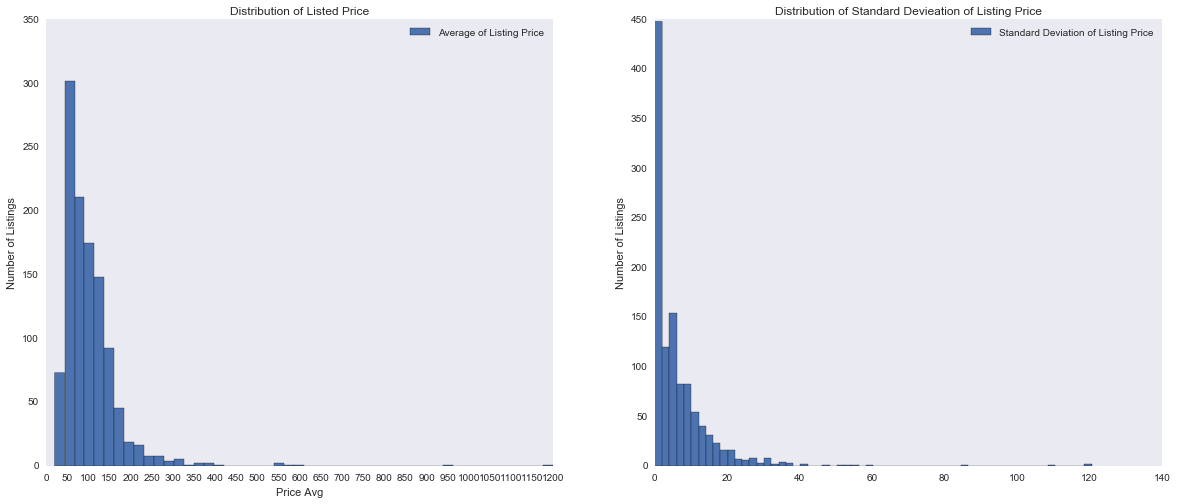

In [23]:
colors = sns.color_palette()

fig = plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.hist(df_calendar_bookable['price_avg'],bins=50, color=colors[0], label="Average of Listing Price")
plt.xlabel('Price Avg')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listed Price')
# plt.xlim([50,1400])
plt.xticks(np.linspace(0,1200,25))
plt.grid(False)
plt.legend()

plt.subplot(1,2,2)
plt.hist(df_calendar_bookable['price_std'], bins=60, color=colors[0], label="Standard Deviation of Listing Price")
plt.ylabel('Number of Listings')
plt.title('Distribution of Standard Devieation of Listing Price')

plt.legend()
plt.grid(False)
print "Percent Listings with No Price Change at All:", len(df_calendar_bookable[df_calendar_bookable['price_std']==0])*1./len(df_calendar_bookable)

### b. Occupancy

In [24]:
df_calendar_bookable['occupancy_1w'] = [1-np.mean(df_calendar_bookable['calendars'][i]['availability'][:7]) for i in df_calendar_bookable.index.values]
df_calendar_bookable['occupancy_2w'] = [1-np.mean(df_calendar_bookable['calendars'][i]['availability'][:14]) for i in df_calendar_bookable.index.values]
df_calendar_bookable['occupancy_1m'] = [1-np.mean(df_calendar_bookable['calendars'][i]['availability'][:30]) for i in df_calendar_bookable.index.values]
df_calendar_bookable['occupancy_3m'] = [1-np.mean(df_calendar_bookable['calendars'][i]['availability'][:90]) for i in df_calendar_bookable.index.values]

In [25]:
df_calendar_bookable.head()

,calendars,id,openings,price_avg,price_std,occupancy_1w,occupancy_2w,occupancy_1m,occupancy_3m
0,availability date min_nights price...,9412617,"[[2016-04-16 00:00:00, 2016-04-19 00:00:00, 3,...",168.031579,5.322154,0.857143,0.928571,0.800000,0.722222
1,availability date min_nights price...,1646607,"[[2016-04-17 00:00:00, 2016-04-20 00:00:00, 38...",74.000000,0.000000,0.000000,0.000000,0.000000,0.044444
2,availability date min_nights price...,671765,"[[2016-05-04 00:00:00, 2016-05-07 00:00:00, 31...",27.000000,0.000000,1.000000,1.000000,1.000000,0.433333
3,availability date min_nights price...,753687,"[[2016-04-15 00:00:00, 2016-04-18 00:00:00, 5,...",115.000000,0.000000,1.000000,1.000000,0.700000,0.466667
4,availability date min_nights price...,1810457,"[[2016-04-20 00:00:00, 2016-04-23 00:00:00, 22...",115.000000,0.000000,1.000000,0.500000,0.266667,0.322222


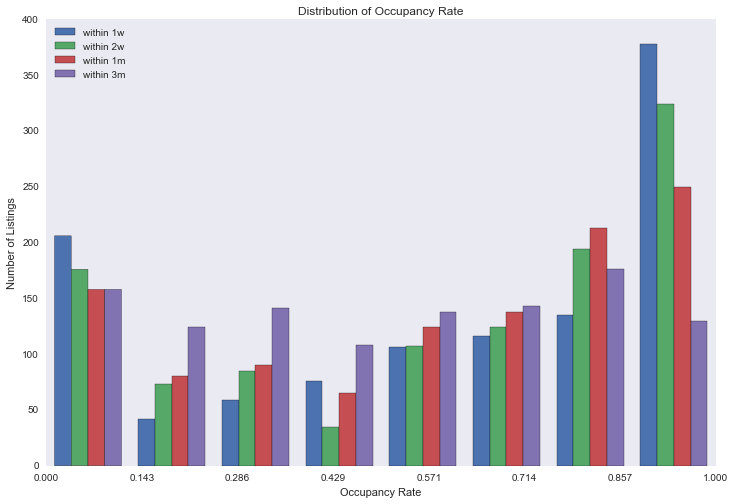

In [26]:
fig = plt.figure(figsize=[12,8], facecolor=None)
hist_multi = [df_calendar_bookable['occupancy_1w'], df_calendar_bookable['occupancy_2w'], df_calendar_bookable['occupancy_1m'], df_calendar_bookable['occupancy_3m']]
labels = ["within 1w", "within 2w", "within 1m", "within 3m"]
plt.hist(hist_multi, bins=8, color=colors[:4], label=labels)
plt.xlabel('Occupancy Rate')
plt.ylabel('Number of Listings')
plt.title('Distribution of Occupancy Rate')
# plt.xlim([1./7,1])
plt.xticks(np.linspace(0,1,8))

plt.legend(loc="upper left")
plt.grid(False)

### c. Days in advance

In [27]:
all_day_in_advance = [df_calendar_bookable.openings.values[i][0][4] for i in range(len(df_calendar_bookable))]

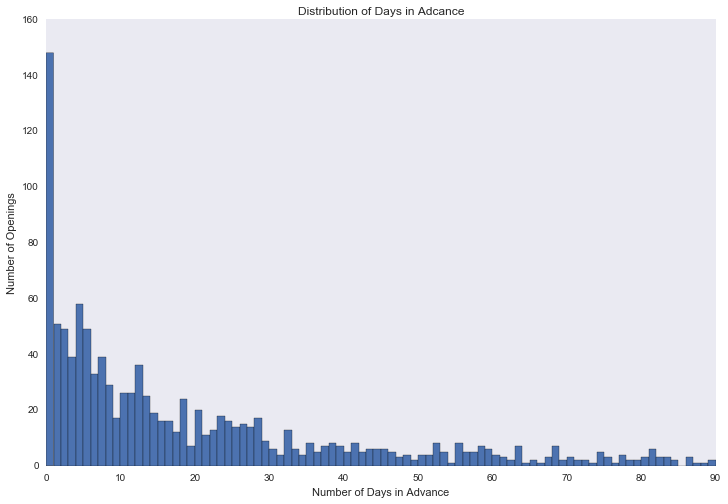

In [28]:
fig = plt.figure(figsize=[12,8], facecolor=None)
plt.hist(all_day_in_advance, bins=90)
plt.xlabel('Number of Days in Advance')
plt.ylabel('Number of Openings')
plt.title('Distribution of Days in Adcance')
# plt.xlim([0,1])

plt.grid(False)

### d. Length of Opening

In [29]:
all_length = [df_calendar_bookable.openings.values[i][0][2] for i in range(len(df_calendar_bookable))]

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


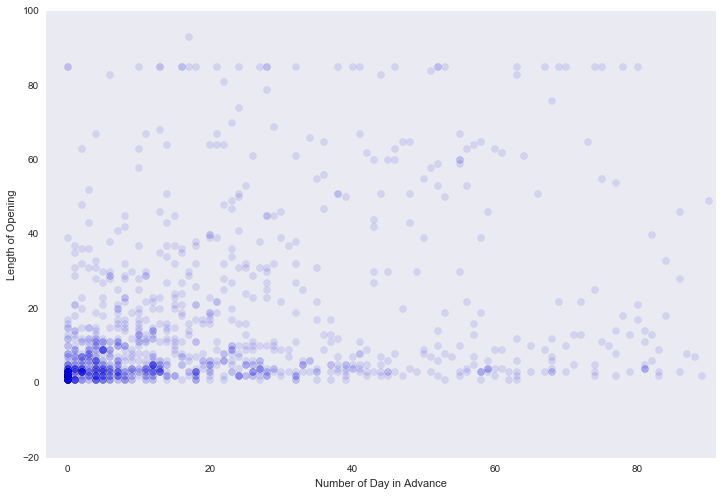

In [30]:
fig = plt.figure(figsize=[12,8], facecolor=None)
plt.scatter(all_day_in_advance, all_length, s=50, alpha=0.1)

plt.legend()
plt.xlabel("Number of Day in Advance")
plt.ylabel("Length of Opening")
plt.xlim([-3, 91])
# plt.ylim([-1, 35])

plt.grid(False)

### e. Number of Openings per Property

Maximum number of openings:  13


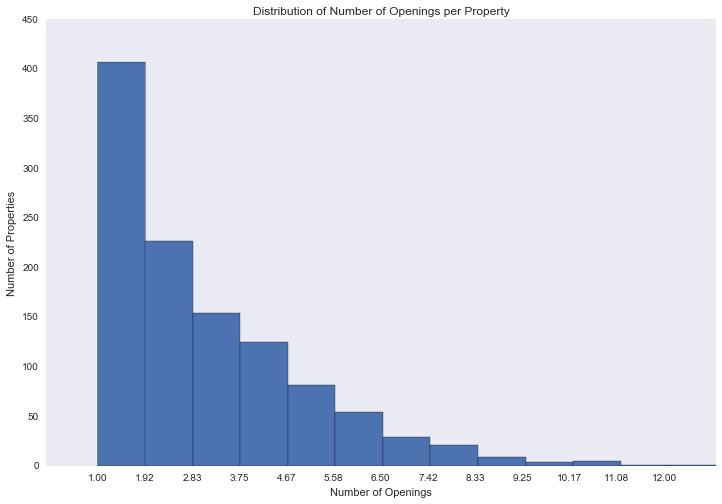

In [31]:
count_openings_by_property = [len(df_calendar_bookable.openings[i]) for i in range(len(df_calendar_bookable))]
max_opening=max(count_openings_by_property)
print "Maximum number of openings: ", max_opening

fig = plt.figure(figsize=[12,8], facecolor=None)
plt.hist(count_openings_by_property, bins=max_opening)
plt.xlabel('Number of Openings')
plt.ylabel('Number of Properties')
plt.title('Distribution of Number of Openings per Property')
plt.xticks(np.linspace(1,12,13))
# plt.xticklabels(np.linspace(0,12,13))
plt.xlim([0,13])

plt.legend()
plt.grid(False)

# Enforce 1-to-1 mapping between property, host and opening

### Between Host and Property ###

Merge the property list to host list

In [53]:
df_merged = pd.merge(df_calendar_bookable, listings_original, on='id', how='inner')

responses= pd.read_csv("csv_merged/Responses 0328.csv")
df_merged_responses = pd.merge(df_merged,responses,  how='inner',  left_on=['id'], right_on=['id'])
df_merged_responses.head()

,calendars,id,openings,price_avg,price_std,occupancy_1w,occupancy_2w,occupancy_1m,occupancy_3m,listing_url,...,host_total_listings_count,monthly_price,minimum_nights,number_of_reviews,instant_bookable,room_type,beds,availability,price,discount
0,availability date min_nights price...,6651949,"[[2016-04-03 00:00:00, 2016-04-06 00:00:00, 11...",148.715789,1.533233,0.000000,0.214286,0.500000,0.611111,https://www.airbnb.com/rooms/6651949,...,1,"$3,800.00",1,12,f,Entire home/apt,2,0,NaN,NaN
1,availability date min_nights price...,5029952,"[[2016-03-30 00:00:00, 2016-04-02 00:00:00, 3,...",159.684211,20.343504,0.571429,0.785714,0.766667,0.488889,https://www.airbnb.com/rooms/5029952,...,1,NaN,1,44,f,Entire home/apt,3,1,135,NaN
2,availability date min_nights price...,5021777,"[[2016-03-31 00:00:00, 2016-04-03 00:00:00, 31...",69.000000,0.000000,0.000000,0.000000,0.000000,0.044444,https://www.airbnb.com/rooms/5021777,...,1,NaN,3,23,t,Private room,1,-1,NaN,NaN
3,availability date min_nights price...,8634383,"[[2016-04-01 00:00:00, 2016-04-02 00:00:00, 1,...",116.621053,13.081267,0.857143,0.928571,0.700000,0.333333,https://www.airbnb.com/rooms/8634383,...,8,NaN,1,16,t,Private room,2,1,75,NaN
4,availability date min_nights price...,1581286,"[[2016-04-01 00:00:00, 2016-04-04 00:00:00, 3,...",37.000000,0.000000,0.571429,0.785714,0.766667,0.344444,https://www.airbnb.com/rooms/1581286,...,7,$800.00,1,13,f,Private room,1,-1,NaN,NaN


In [33]:
df_merged.head()

,calendars,id,openings,price_avg,price_std,occupancy_1w,occupancy_2w,occupancy_1m,occupancy_3m,listing_url,...,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,monthly_price,minimum_nights,number_of_reviews,instant_bookable,room_type,beds
0,availability date min_nights price...,9412617,"[[2016-04-16 00:00:00, 2016-04-19 00:00:00, 3,...",168.031579,5.322154,0.857143,0.928571,0.800000,0.722222,https://www.airbnb.com/rooms/9412617,...,100%,100%,f,1,NaN,3,0,t,Entire home/apt,3
1,availability date min_nights price...,1646607,"[[2016-04-17 00:00:00, 2016-04-20 00:00:00, 38...",74.000000,0.000000,0.000000,0.000000,0.000000,0.044444,https://www.airbnb.com/rooms/1646607,...,100%,50%,t,2,NaN,2,10,f,Private room,2
2,availability date min_nights price...,671765,"[[2016-05-04 00:00:00, 2016-05-07 00:00:00, 31...",27.000000,0.000000,1.000000,1.000000,1.000000,0.433333,https://www.airbnb.com/rooms/671765,...,98%,100%,f,6,NaN,5,98,f,Private room,2
3,availability date min_nights price...,753687,"[[2016-04-15 00:00:00, 2016-04-18 00:00:00, 5,...",115.000000,0.000000,1.000000,1.000000,0.700000,0.466667,https://www.airbnb.com/rooms/753687,...,70%,NaN,f,1,"$2,800.00",3,49,f,Entire home/apt,1
4,availability date min_nights price...,1810457,"[[2016-04-20 00:00:00, 2016-04-23 00:00:00, 22...",115.000000,0.000000,1.000000,0.500000,0.266667,0.322222,https://www.airbnb.com/rooms/1810457,...,100%,100%,f,1,"$2,800.00",3,43,f,Entire home/apt,2


In [34]:
host_property = df_merged[["host_id", "id"]]
by_host = host_property.groupby('host_id')
count_property = by_host["id"].count()

count_property_sorted = count_property.sort_values(ascending=False).reset_index()
print "Unique hosts: ", len(count_property_sorted)
print "Number of Properties: ", len(df_merged)
print "Table: Top super-landlords"
count_property_sorted.head(10)

Unique hosts:  914
Number of Properties:  1118
Table: Top super-landlords


,host_id,id
0,38123545,7
1,20828747,6
2,35659953,6
3,24597265,5
4,7557833,5
5,40176101,5
6,1172202,5
7,29762,5
8,45416627,5
9,25843005,5


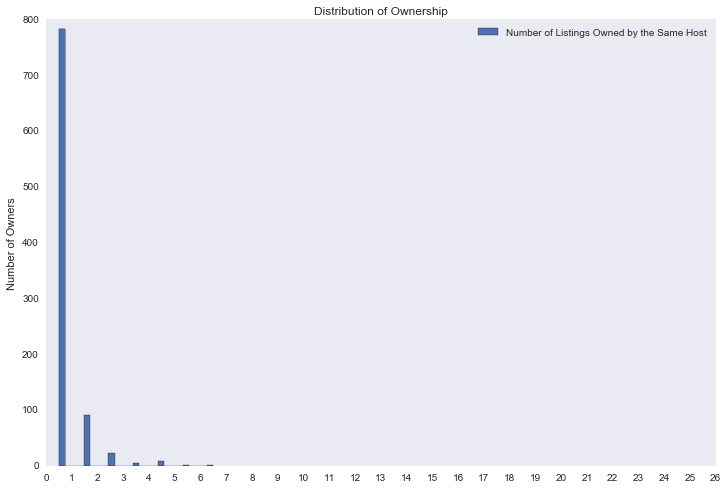

In [35]:
fig = plt.figure(figsize=[12,8], facecolor=None)

plt.hist(count_property.values-0.5, color=colors[0], bins=25, alpha=1, label="Number of Listings Owned by the Same Host")

# plt.xlabel('Occupancy Rate')
plt.ylabel('Number of Owners')
plt.title('Distribution of Ownership')
plt.xlim([0,26])
plt.xticks(np.linspace(0,26,27))
plt.legend()
plt.grid(False)

### Between Host and Opening

In [36]:
df_sample = df_merged[["host_id", "id", "openings", "beds", "host_name"]]

In [37]:
df_sample.head()

,host_id,id,openings,beds,host_name
0,48804477,9412617,"[[2016-04-16 00:00:00, 2016-04-19 00:00:00, 3,...",3,Ally
1,8708720,1646607,"[[2016-04-17 00:00:00, 2016-04-20 00:00:00, 38...",2,Nehprii
2,29762,671765,"[[2016-05-04 00:00:00, 2016-05-07 00:00:00, 31...",2,S&I
3,3964655,753687,"[[2016-04-15 00:00:00, 2016-04-18 00:00:00, 5,...",1,Nicole
4,9485276,1810457,"[[2016-04-20 00:00:00, 2016-04-23 00:00:00, 22...",2,Denis


#### Append indicators for calendar buckets

The "bucket matrix" column added to the dataframe indicates which type of opening the property has.

* From left to right: 1-day, 2-day, 3-day, >3 days
* From top to bottom: within 1 wk, within 2 wk, more than 2 wk

In [38]:
list_openings_all = []

for row in df_sample.values:
#     print row
    for opening in row[2]:
        bucket_matrix = np.zeros([3,4])
        length = "3day+"
        length_position = 3
        if opening[2]==1:
            length = "1day"
            length_position = 0
        elif opening[2]==2:
            length = "2day"
            length_position = 1            
        elif opening[2]==3:
            length = "3day"
            length_position = 2            

        advance = "2weeks+"
        advance_position = 2
        if opening[4]<14:
            advance = "within2weeks"
            advance_position = 1
        if opening[4]<7:
            advance = "within1weeks"
            advance_position = 0
                
        bucket_label= length + "," + advance        
        bucket_matrix[advance_position][length_position] = 1
        list_openings_all.append((row[0], row[1], row[3], row[4] ,opening[0], opening[1], opening[3], opening[2], opening[4], opening[5], opening[6], bucket_label, length_position, advance_position, bucket_matrix))

df_openings_all = pd.DataFrame(list_openings_all, columns=['host_id', 'property_id', 'bed', 'host_name', 'start', 'end', 'min_nights', 'opening_length', 'advance', 'trip_length', 'nightly_price', 'bucket_label', 'length_position', 'advance_position', 'bucket_matrix'])

In [39]:
print "total nubmer of openings: ", len(df_openings_all)
df_openings_all.head()

total nubmer of openings:  3124


,host_id,property_id,bed,host_name,start,end,min_nights,opening_length,advance,trip_length,nightly_price,bucket_label,length_position,advance_position,bucket_matrix
0,48804477,9412617,3,Ally,2016-04-16,2016-04-19,3,3,17,3,165,"3day,2weeks+",2,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
1,48804477,9412617,3,Ally,2016-05-09,2016-05-12,3,4,40,3,165,"3day+,2weeks+",3,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
2,48804477,9412617,3,Ally,2016-05-22,2016-05-25,3,3,53,3,165,"3day,2weeks+",2,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
3,48804477,9412617,3,Ally,2016-06-15,2016-06-18,3,5,77,3,174,"3day+,2weeks+",3,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
4,8708720,1646607,2,Nehprii,2016-04-17,2016-04-20,2,38,18,3,74,"3day+,2weeks+",3,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."


### Weight method 1: Availability by Openings

The matrix is the count of total number of openings in each bucket. For example, there are 71 1-day openings within a week. Some of them may or may not belong to the same host or property.

In [40]:
bucket_count_by_host1 =np.sum(df_openings_all["bucket_matrix"].values, axis=0)
print "Available bucket by openings: \n", bucket_count_by_host1
weight_matrix1 = 1/bucket_count_by_host1**2
print "Weight matrix: \n", weight_matrix1

Available bucket by openings: 
[[   69.    95.    69.   234.]
 [   36.    40.    49.   192.]
 [  198.   313.   344.  1485.]]
Weight matrix: 
[[  2.10039908e-04   1.10803324e-04   2.10039908e-04   1.82628388e-05]
 [  7.71604938e-04   6.25000000e-04   4.16493128e-04   2.71267361e-05]
 [  2.55076013e-05   1.02073105e-05   8.45051379e-06   4.53468467e-07]]


### Weight method 2: Availability by Host

If a host has a certain bucket type of opening, we add 1 to the "availability matrix". Therefore the matrix is the count of hosts who have certain types of openings. For example, there are 53 hosts who have 1-day openings within a week, and each host here may have one or more 1-day opneing(s) within a week.

In [41]:
bucket_available_by_host = df_openings_all[['host_id', 'bucket_matrix']].groupby("host_id").apply(np.sum)
bucket_available_by_host = bucket_available_by_host
bucket_available_by_host.head()

,host_id,bucket_matrix
host_id,,
2881,11524,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
3533,3533,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
23435,140610,"[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], [..."
24375,24375,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [..."
25183,377745,"[[0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 0.0, 1.0], [..."


In [42]:
bucket_count_by_host2 =np.sum([np.sign(matrix) for matrix in bucket_available_by_host["bucket_matrix"].values], axis=0)
print "Available bucket by host: \n", bucket_count_by_host2

weight_matrix2 = 1/bucket_count_by_host2**2
print "Weight matrix: \n", weight_matrix2

Available bucket by host: 
[[  61.   87.   66.  221.]
 [  31.   40.   48.  179.]
 [ 100.  182.  214.  735.]]
Weight matrix: 
[[  2.68744961e-04   1.32117849e-04   2.29568411e-04   2.04746013e-05]
 [  1.04058273e-03   6.25000000e-04   4.34027778e-04   3.12100122e-05]
 [  1.00000000e-04   3.01895906e-05   2.18359682e-05   1.85108057e-06]]


In [43]:
df_openings_all["weight1"] = [weight_matrix1[row[13],row[12]] for row in df_openings_all.values]
df_openings_all["weight2"] = [weight_matrix2[row[13],row[12]] for row in df_openings_all.values]

### Compare Method 1 and 2 with Benchmark 0: Selecting openings randomly

In [44]:
host_list = bucket_available_by_host.index.values
sample_index_list0 = []
sample_index_list1 = []
sample_index_list2 = []


for (i,host) in zip(range(len(host_list)), host_list):
    rows = df_openings_all[df_openings_all["host_id"]==host]
    sample_index_list0.append(rows.sample().index.values)    
    sample_index_list1.append(rows.sample(weights=rows["weight1"].values).index.values)
    sample_index_list2.append(rows.sample(weights=rows["weight2"].values).index.values)

We can see that using either weighting method, the samples are much more balanced than randomly selecting samples. With Boston hosts, we found more than 20 samples for each bucket category.

Method 1 seems more balanced and straight-forward to understand.

In [45]:
df_selected0 = df_openings_all.ix[np.ravel(sample_index_list0)]
print "Number of Samples: ", len(df_selected0)
print "Bucket Distribution: \n", np.sum(df_selected0["bucket_matrix"].values, axis=0)

Number of Samples:  914
Bucket Distribution: 
[[  20.   24.   28.  101.]
 [   5.    6.    8.   65.]
 [  29.   65.   79.  484.]]


In [46]:
df_selected1 = df_openings_all.ix[np.ravel(sample_index_list1)]
print "Number of Samples: ", len(df_selected1)
print "Bucket Distribution: \n", np.sum(df_selected1["bucket_matrix"].values, axis=0)

Number of Samples:  914
Bucket Distribution: 
[[  32.   53.   41.  131.]
 [  26.   34.   38.  113.]
 [  35.   60.   79.  272.]]


In [47]:
df_selected2 = df_openings_all.ix[np.ravel(sample_index_list2)]
print "Number of Samples: ", len(df_selected2)
print "Bucket Distribution: \n", np.sum(df_selected2["bucket_matrix"].values, axis=0)

Number of Samples:  914
Bucket Distribution: 
[[  38.   49.   42.  128.]
 [  24.   26.   36.  102.]
 [  44.   59.   87.  279.]]


### Done with sampling!

Let's look at our data (df_selected1):
* start: start date of the trip
* end: end date of the trip
* min_nights: minimun stay at the beginning of the start date
* opening_length: this is the length of the opening, and we select a shorter trip of the opening is more than 3 days
* advance: number of days in advance from the start date
* trip_length: length of our stay, should be 1, 2, or 3
* nightly_price: average price for the chosen length of stay

There may still be details that I overlooked in the sampling, which may cause messaging failures.

In [48]:
df_selected1.head()

,host_id,property_id,bed,host_name,start,end,min_nights,opening_length,advance,trip_length,nightly_price,bucket_label,length_position,advance_position,bucket_matrix,weight1,weight2
2289,2881,6027345,1,Loli,2016-05-22,2016-05-25,2,3,53,3,70,"3day,2weeks+",2,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",8.450514e-06,0.000022
2989,3533,9076464,2,Winter,2016-06-16,2016-06-19,2,18,78,3,123,"3day+,2weeks+",3,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",4.534685e-07,0.000002
1829,23435,10875500,1,Emily,2016-04-06,2016-04-09,3,6,7,3,138,"3day+,within2weeks",3,1,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...",2.712674e-05,0.000031
899,24375,428140,2,Mira,2016-04-03,2016-04-06,2,10,4,3,166,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",1.826284e-05,0.000020
105,25183,8490,4,Nathalie,2016-05-26,2016-05-28,2,2,57,2,138,"2day,2weeks+",1,2,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",1.020731e-05,0.000030


In [49]:
days1_weeksM = df_selected1.loc[df_selected1['bucket_label'] == "1day,2weeks+"]
days2_weeksM = df_selected1.loc[df_selected1['bucket_label'] == "2day,2weeks+"]
days3_weeksM = df_selected1.loc[df_selected1['bucket_label'] == "3day,2weeks+"]
daysM_weeksM = df_selected1.loc[df_selected1['bucket_label'] == "3day+,2weeks+"]


days1_weeks2 = df_selected1.loc[df_selected1['bucket_label'] == "1day,within2weeks"]
days2_weeks2 = df_selected1.loc[df_selected1['bucket_label'] == "2day,within2weeks"]
days3_weeks2 = df_selected1.loc[df_selected1['bucket_label'] == "3day,within2weeks"]
daysM_weeks2 = df_selected1.loc[df_selected1['bucket_label'] == "3day+,within2weeks"]

days1_weeks1 = df_selected1.loc[df_selected1['bucket_label'] == "1day,within1weeks"]
days2_weeks1 = df_selected1.loc[df_selected1['bucket_label'] == "2day,within1weeks"]
days3_weeks1 = df_selected1.loc[df_selected1['bucket_label'] == "3day,within1weeks"]
daysM_weeks1 = df_selected1.loc[df_selected1['bucket_label'] == "3day+,within1weeks"]

print len (days1_weeksM) 
print len (days2_weeksM) 
print len (days3_weeksM)
print len (daysM_weeksM) 


print len (days1_weeks2) 
print len (days2_weeks2) 
print len (days3_weeks2) 
print len (daysM_weeks2) 

print len (days1_weeks1) 
print len (days2_weeks1) 
print len (days3_weeks1)
print len (daysM_weeks1) 

days1_weeksM 
days2_weeksM 
days3_weeksM 
daysM_weeksM 


days1_weeks2 
days2_weeks2 
days3_weeks2
daysM_weeks2 

days1_weeks1 
days2_weeks1
days3_weeks1
daysM_weeks1 







35
60
79
272
26
34
38
113
32
53
41
131


,host_id,property_id,bed,host_name,start,end,min_nights,opening_length,advance,trip_length,nightly_price,bucket_label,length_position,advance_position,bucket_matrix,weight1,weight2
899,24375,428140,2,Mira,2016-04-03,2016-04-06,2,10,4,3,166.000000,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
1391,58745,486915,4,Lester,2016-04-03,2016-04-06,1,14,4,3,77.666667,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
2207,59777,46859,2,Thais,2016-04-01,2016-04-04,2,15,2,3,60.666667,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
330,214871,5989141,4,Andrew,2016-04-04,2016-04-07,1,6,5,3,124.333333,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
79,257541,6389979,2,Isamar,2016-04-03,2016-04-06,2,19,4,3,77.000000,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
1304,306394,1354973,1,Marialuisa,2016-03-30,2016-04-02,1,16,0,3,57.333333,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
2981,335846,1334995,1,A,2016-03-30,2016-04-02,2,4,0,3,87.666667,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
1456,580049,9088278,2,Marta,2016-04-02,2016-04-05,2,6,3,3,128.000000,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
2624,608396,4037522,1,Kiara,2016-03-30,2016-04-02,1,4,0,3,54.000000,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002
690,610690,5736059,1,Julien,2016-04-02,2016-04-05,3,7,3,3,65.000000,"3day+,within1weeks",3,0,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",0.000018,0.00002


### Final Output

Below is the final output for sampling:

* property_id: property to email to
* start: start date of the trip
* end: end date of the trip

In [50]:
df_sample_final = df_selected1[["property_id", "start", "end", "nightly_price", "bed"]].reset_index(drop=True)

days1_weeksM = days1_weeksM [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
days2_weeksM = days2_weeksM [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
days3_weeksM = days3_weeksM [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
daysM_weeksM = daysM_weeksM [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)

days1_weeks2 = days1_weeks2 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
days2_weeks2 = days2_weeks2 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
days3_weeks2 = days3_weeks2 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
daysM_weeks2 = daysM_weeks2 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)

days1_weeks1 = days1_weeks1 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
days2_weeks1 = days2_weeks1 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
days3_weeks1 = days3_weeks1 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)
daysM_weeks1 = daysM_weeks1 [["property_id", "start", "end", "nightly_price", "bed", "host_name"]].reset_index(drop=True)

mailing = {
          'days1_weeksM': days1_weeksM,  
          'days2_weeksM': days2_weeksM,  
          'days3_weeksM': days3_weeksM,  
          'daysM_weeksM': daysM_weeksM,  
    
          'days1_weeks2': days1_weeks2,  
          'days2_weeks2': days2_weeks2,  
          'days3_weeks2': days3_weeks2,  
          'daysM_weeks2': daysM_weeks2,  
    
          'days1_weeks1': days1_weeks1,  
          'days2_weeks1': days2_weeks1,  
          'days3_weeks1': days3_weeks1,  
          'daysM_weeks1': daysM_weeks1  
          
          
          }

df_sample_final.head()

df_sample_final.head()
mailing['daysM_weeks1']['start']= mailing['daysM_weeks1']['start'].apply(lambda x: str(x))

for key in mailing:
    mailing[key]['start']= mailing[key]['start'].apply(lambda x: str(x))
    mailing[key]['start']= mailing[key]['start'].apply(lambda x: x[:10])
    mailing[key]['end'] =mailing[key]['end'].apply(lambda x: str(x))
    mailing[key]['end']= mailing[key]['end'].apply(lambda x: x[:10])
    
    #rint mailing[key]['start'][0]
    
print mailing['daysM_weeks1']['start'][3]
print mailing['daysM_weeksM']['end'].head()

2016-04-04
0    2016-06-19
1    2016-05-18
2    2016-06-14
3    2016-04-25
4    2016-04-22
Name: end, dtype: object


### Message generation

In [51]:
'''
Hi, my name is Michele  and I am interested in staying at your place for 1 day from 3/20/16 to 3/21/16. 
The calendar is open on these days and I am wondering if it is still available? 

A little bit more about myself: I am a graduate student from Milan, Italy and study Communication Design.
I will visit Boston a few times this year to work on a project with a local school. 
I am fond of exploring cultures and visual arts around the world.

I am wondering if you would be willing to lower the rate to $85/night? The trip is really soon and my schedule matches perfectly with the opening in your calendar. So I would be willing to make the booking immediately if the price is ok with you.

'''

'''
Hello,
I'm Michele, I'd like to stay at your place 
Are these days still free? 

Something more about me: I'm a graduate student from Milan, Italy. 
I'm fascinated by visual arts and I love to delve into new cultures. 

Can I ask you if you could lower the rate to
'''

'''
Hey, I'm Michele, I'd like to stay at your place  Are these days still free? 

Something more about me: I'm a graduate student from Milan, Italy. 
I'm fascinated by visual arts and I love to delve into new cultures. 

'''

'''
Hello! My name is Michele and I am an italian design student. 
I’m passionate about photography and art, but in my spare time I love to do any outdoor activity! 
I’ve been in the States for 11 months a few years back, as an exchange student. 
I loved it so I’m very happy every time I get a chance to come back, even if only for a short period.
I’d be very interested in staying at your place for 1 day from 3/20/16 to 3/21/16. Is this period still open?
I’m also wondering if you would be willing to lower the rate to $85/night? 
The trip is really soon and my schedule matches perfectly with the opening in your calendar. 

So I would be willing to make the booking immediately if the price is ok with you.


'''

from random import randint



import datetime

def calculate_duration(start, end):
    #start = datetime.datetime.strptime(start, '%Y-%m-%d')
    #end = datetime.datetime.strptime(end, '%Y-%m-%d')

    days_in_advance = (end - start).days
    if days_in_advance < 1:
        days_in_advance = 1
    return days_in_advance

def generateMessage(host_name, start, end, price, num_guests, k):
    #this is a list storing all reasons for each 
    city = "New York"
    #days_advance = (datetime.datetime.strptime(start, '%Y-%m-%d') - datetime.datetime.today()).days
    
    #start = str(start)
    #end = str(end)
    #start= start[:10]
    #end= end[:10]
    reason_t = []
    message_1_t= []
    message_2_t= []
    message_3_t= []
    addition_two_persons_t= []
    addition_n_persons_t= []
    
    
    message_structure= randint(0,1)
    
    if  k == 'daysM_weeksM' or k == 'daysM_weeks2' or k == 'daysM_weeks1' :
        reason = ""        
    elif k == 'days1_weeks1' or k == 'days2_weeks1' or k == 'days3_weeks1'  :
        reason_t.append (" Since the trip is coming up very soon, and I found my schedule matches perfectly with the opening in your calendar,")
        reason_t.append (" It will not be long before the trip, and it looks like my schedule matches with the opening in your calendar, so")
        reason_t.append (" Since the travel is just around the corner, and it looks like my schedule fits the opening in your calendar, so")
        reason = reason_t[randint(0,2)]
        
    else: 
        reason_t.append ( " Because my schedule matches perfectly with the opening in your calendar,")
        reason_t.append ( "Since my trip schedule completely fits the opening in your calendar,")
        
        reason = reason_t[randint(0,1)]
    #duration = calculate_duration(start, end)
    if "days1" in k:
        duration =1
    if "days2" in k:    
        duration =2
    if "days3" in k:    
        duration =3
    if "daysM" in k:    
        duration =2
    
    if duration == 1:
        duration = str(duration) + ' day'
    else:
        duration = str(duration) + ' days'
    format2= randint(0,1)    

    message_1_t.append ('Hi {}, my name is Michele and I am interested in staying at your place for {}, from {} to {}. The calendar is open on these days and I am wondering if it is still available? '.format(host_name ,duration, start , end) )
    message_1_t.append ('Hello {}, I am Michele, I would like to stay at your place for {}, from {} to {}. Are these days still free?\n '.format(host_name ,duration, start , end) )   
    message_1_t_1 = 'Hello {}! My name is Michele and I am an italian design student. I am passionate about photography and art, but in my spare time I love to do any outdoor activity! I have been in the States for 11 months a few years back, as an exchange student. I loved it so I am very happy every time I get a chance to come back, even if only for a short period.'.format(host_name)
    message_1 = message_1_t[randint(0,1)]
    if message_structure == 1:
        message_1 = message_1_t_1
    
    message_2_t.append ('\nA little bit more about myself: I am a graduate student from Milan, Italy and study Communication Design. I am fond of exploring cultures and visual arts around the world.' )
    message_2_t.append ('Something more about me: I am a graduate student from Milan, Italy. I am fascinated by photography and I love to delve into new cultures.' )
    message_2_t_1= 'I would be very interested in staying at your place for {}, from {} to {}. Is this period still open?'.format(duration, start , end)
    message_2 = message_2_t[randint(0,1)]
    if message_structure == 1:
        message_2 = message_2_t_1

    message_3_t.append ( '{} I am wondering if you would be willing to lower the rate to ${}/night? I would be willing to make the booking immediately if the price is ok with you.'.format(reason,price) )
    message_3_t.append ('{} can I ask you if you could lower the rate to ${}/night? I would be willing to make the booking immediately if the price is ok with you.'.format(reason,price)) 
    message_3_t_1 = '{} I am also wondering if you would be willing to lower the rate to ${}/night? \nI would be willing to make the booking immediately if the price is ok with you.'.format(reason,price) 
    message_3 = message_3_t[randint(0,1)]
    if message_structure == 1:
        message_3 = message_3_t_1
    
    if(num_guests==1 or num_guests==0 or np.isnan(num_guests)):
        return message_1 + message_2 + message_3
    elif (num_guests ==2 ):
        addition_two_persons_t.append ('I will visit New York a few times this year to work on a project with a local school. I will be there with a colleague of mine, who will stay with me. ')
        addition_two_persons_t.append ('\nI will be in New York a few times during this year to work on a project with a local university. I will be there with a colleague of mine, who will stay with me. ')
        addition_two_persons = addition_two_persons_t[randint(0,1)]
        return message_1 + message_2 + addition_two_persons + message_3
    else: 
        addition_n_persons_t .append ( '\nI will visit New York a few times this year to work on a project with a local school. I will be there with {} colleagues of mine, who will stay with me. '.format(int(num_guests - 1)) )
        addition_n_persons_t .append ('I will be in New York a few times during this year to work on a project with a local university. I will be there with {} colleagues of mine, who will stay with me. '.format(int(num_guests - 1)) )
        addition_n_persons = addition_n_persons_t[randint(0,1)]
        return message_1 + message_2 + addition_n_persons + message_3
    
    
    
messages = {}
discount = [0.6, 0.7, 0.8, 0.9]

def getDiscountPrice(price, discount):
    return 5 * (int(price * discount) / 5)

for k, v in mailing.iteritems():
    msg_list = [] 
    discount_list = []
    percentage_list=[]
    for index, row in v.iterrows():
        msg = generateMessage(row['host_name'], row['start'], row['end'], getDiscountPrice(row['nightly_price'], discount[index % 4]),
                              row['bed'], str(k))
        print msg
        msg_list.append(msg)
        discount_list.append(discount[index % 4])
        
    mailing[k]['messages'] = msg_list
    mailing[k]['discount_asked'] = discount_list
    mailing[k].to_json(str(k) + ".json")
    
print mailing ['daysM_weeks1'].head()

    
    

    

Hello Sarah! My name is Michele and I am an italian design student. I am passionate about photography and art, but in my spare time I love to do any outdoor activity! I have been in the States for 11 months a few years back, as an exchange student. I loved it so I am very happy every time I get a chance to come back, even if only for a short period.I would be very interested in staying at your place for 3 days, from 2016-04-12 to 2016-04-15. Is this period still open?
I will visit New York a few times this year to work on a project with a local school. I will be there with 2 colleagues of mine, who will stay with me. Since my trip schedule completely fits the opening in your calendar, I am also wondering if you would be willing to lower the rate to $95/night? 
I would be willing to make the booking immediately if the price is ok with you.
Hello Maria! My name is Michele and I am an italian design student. I am passionate about photography and art, but in my spare time I love to do any 